In [43]:
from dqnotebook import QuadraticDrawer
%matplotlib notebook
import matplotlib as mpl
mpl.use("pgf")
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy.integrate import odeint
import sys
import numpy as np
from cmath import *
from obj import Monodromy, QuadraticDifferential
pgf_with_pdflatex = {
    "pgf.texsystem": "pdflatex"
}
mpl.rcParams.update(pgf_with_pdflatex)
mpl.rcParams['lines.linewidth'] = 10

In [44]:
lim = 30
maxreps = 50000
maxint = 100
t= np.linspace(0,.5,2) #intervalo temporal
normav = 0.001
ri=sqrt(1j)
ric=sqrt(-1j)

In [182]:
class TrajectorySolver:
    """clase que representa una trayectoria y los metodos para calcularla"""

    def __init__(self, quad, plotpoint, spacing=.3, longmax = 100, phase = None):
        self.qd = quad
        if phase: self._phase = phase
        else: self._phase = quad.phase
        self.plotpoint = plotpoint
        self.first = plotpoint
        self.last = plotpoint
        self.first_mon = Monodromy(quad(plotpoint).conjugate())
        self.last_mon = Monodromy(quad(plotpoint).conjugate())
        self.coordinates = np.array([[plotpoint.real, plotpoint.imag]])
        self.spacing=spacing
        self.longmax = longmax

    def __call__(self):
        if self.first == self.last:
            self.tp()
            self.tn()
            sys.stdout.write(".")
            sys.stdout.flush()
        return self.coordinates

    def traject(self, sign, mon, z):
        norma = 0.5
        coord = np.array([[z.real, z.imag]])
        rep = 0
        fin = z
        inicio = z
        ultimo = 0.0
        start = z
        longitud = 0.0
        F = lambda y,t,mono: [sign*self.f(y,t,mono)[0],sign*self.f(y,t,mono)[1],normav*abs(sqrt(self.qd.QD(complex(y[0],y[1]))))]
#        F = lambda y,t,mono: [sign*self.f(y,t,mono)[0],sign*self.f(y,t,mono)[1],normav]
        while (self.qd.close_2pole(fin) and self.qd.close_2smplpole(fin) and norma < lim and rep < maxreps):
            sol = odeint(F, [inicio.real, inicio.imag, longitud], t, mxstep = maxint, args=(mon,))
            fin = complex(sol[-1,0], sol[-1,1])
            mon(self.qd(fin).conjugate())
            longitud = sol[-1,2]
            if self.spacing < longitud-ultimo:
                coord = np.append(coord, np.array([[fin.real, fin.imag]]), axis = 0)
                ultimo = longitud
                #ultimo = fin
            if self.longmax < longitud:
                break
            inicio = fin
            norma = abs(inicio)
            if 50 < rep and 0.01 > abs(fin-start):
                break
            rep += 1
        print longitud
        return coord

    def tp(self):
        self.coordinates = np.vstack((self.coordinates,  self.traject(1, self.last_mon, self.last)))
        self.last=complex(self.coordinates[-1][0], self.coordinates[-1][1])
        return

    def tn(self):
        self.coordinates = np.vstack((self.traject(-1, self.first_mon, self.first)[::-1], self.coordinates))
        self.first=complex(self.coordinates[0][0], self.coordinates[0][1])
        return

    def f(self, y, t, mono):
        x = y[0]
        y = y[1]
        z = mono.dist(self.qd(complex(x,y)).conjugate())
        z *= normav
        if abs(complex(x, y)) > 1:
            z *= abs(complex(x,y))
        return [z.real, z.imag]
   

In [71]:
quad=QuadraticDifferential()

<IPython.core.display.Javascript object>


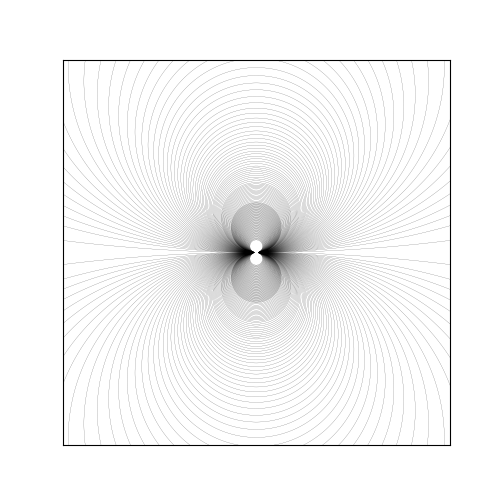

In [72]:
fig9=plt.figure()

In [73]:
quad_drawer9=QuadraticDrawer(quad,fig9,0.1)
limite= 5.0
quad_drawer9.ax.set_ylim(-1*limite,limite)
quad_drawer9.ax.set_xlim(-1*limite,limite)
fig9.set_size_inches(5,5)
plt.axis('on')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

In [74]:
#quad.zeros=[complex(0,0)]
quad.dblpoles = [complex(0,0),complex(0,0)]

In [78]:
quad.phase=rect(1,pi*1.9)
solver=TrajectorySolver(quad,rect(2.5,pi*.95))

In [79]:
puntos = solver()

.

In [53]:
for x in range(puntos.shape[0]):
    plt.plot([puntos[x][0]],[puntos[x][1]],'ro')

In [12]:
puntos.shape[0]

133

In [80]:
for x in range(puntos.shape[0]):
    quad.add_plotpoint(complex(puntos[x][0],puntos[x][1]))

In [81]:
quad.phase=rect(1,0)

In [82]:
quad_drawer9.draw_trajectories()

..........................................................................................................................................................................................................................................................................


In [83]:
plt.savefig('n4.pgf')

In [183]:
quad2 = QuadraticDifferential()

<IPython.core.display.Javascript object>


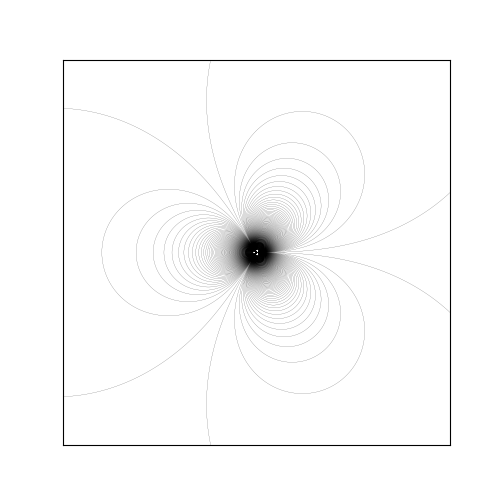

In [184]:
fig2= plt.figure()

In [195]:
quad_drawer2=QuadraticDrawer(quad2,fig2,0.1)
limite= 10.0
quad_drawer2.ax.set_ylim(-1*limite,limite)
quad_drawer2.ax.set_xlim(-1*limite,limite)
fig2.set_size_inches(5,5)
plt.axis('on')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

In [186]:
quad2.dblpoles = [complex(0,0),complex(0,0)]
quad2.smplpoles = [complex(0,0)]

In [191]:
quad2.phase=rect(1,pi*.06)
solver=TrajectorySolver(quad2,rect(.5,pi*.02+4*pi/3),0.1)
puntos = solver()

102.149576988
1.61887127616
.

In [152]:
for x in range(puntos.shape[0]):
    plt.plot([puntos[x][0]],[puntos[x][1]],'go')

In [192]:
for x in range(puntos.shape[0]):
    quad2.add_plotpoint(complex(puntos[x][0],puntos[x][1]))
quad2.phase=rect(1,0)
quad_drawer2.draw_trajectories()

..................................................................................................................................................................................................................................................................................................................


In [196]:
plt.savefig('n5.pgf')